# TüEyeQ dataset validation
Extracking data for comparison with other dataset. 

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm

### Loading the participant features
The table below holds the info we have on each participant. Each participant has a unique subject ID. The info about the tasks was removed, as it was deemed unnecessary. Our taget value should be age / gender.

In [2]:
participant_features = pd.read_csv('TuEyeQ/cft_full.csv', index_col=1)
del participant_features['task_id']
del participant_features['cft_task']
participant_features = participant_features.drop_duplicates()
participant_features.head()

,age,gender,handedness,native_german,native_german_mother,native_language_mother,native_german_father,native_language_father,education_mother,education_father,...,leisure_hobbies,leisure_play_games,leisure_relaxation,leisure_social_activity,leisure_humanitarian_services,leisure_nature_activities,leisure_travel_tourism,study_subject_primary,study_subject_secondary,cft_sum_full
subject,,,,,,,,,,,,,,,,,,,,,
AAB14,19.0,2.0,1.0,1.0,0.0,Türkisch,0.0,Italienisch,2.0,0.0,...,0,0,0,1,0,1,0,"Social sciences, journalism and information",NaN,28.0
AAO14,27.0,2.0,1.0,0.0,0.0,Englisch,0.0,Hindi,NaN,4.0,...,1,0,0,0,0,0,0,"Natural sciences, mathematics and statistics",NaN,30.0
AAR28,29.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,3.0,5.0,...,0,1,0,0,0,1,1,Education,Arts and humanities,35.0
ABT22,21.0,2.0,1.0,1.0,1.0,NaN,0.0,Serbisch,5.0,4.0,...,0,0,0,0,0,0,1,"Business, administration and law",NaN,37.0
ACB13,25.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,3.0,5.0,...,0,0,0,0,0,0,0,"Business, administration and law",NaN,28.0


### Reading eye tracking features
 Here is what eye tracking features for Some of the participants and some readings have been removed due to too much noise. 

In [3]:
eye_tracking_features_path = 'TuEyeQ/EyeMovementData/split'
arbitrary_eye_tracking_features = pd.read_csv(eye_tracking_features_path+'/ABT22/task_01.csv', index_col=0)
arbitrary_eye_tracking_features['gender'] = participant_features.loc['ABT22']['gender']
arbitrary_eye_tracking_features.head(6)

,starttime,duration,meanPupilDiameter,eye,eventType,eventIdxLeft,eventIdxRight,meanX,meanY,startSaccadeX,startSaccadeY,endSaccadeX,endSaccadeY,microsaccadeCount,microsaccadeAmplitude,microsaccadePeakVelocity,gender
14,3032142,44,NaN,left,saccade,1.0,NaN,NaN,NaN,514.678,410.290,701.580,311.073,NaN,NaN,NaN,2.0
15,3032146,40,NaN,right,saccade,1.0,4.0,NaN,NaN,554.941,409.684,713.569,319.930,NaN,NaN,NaN,2.0
16,3032190,100,3.053042,left,fixation,1.0,NaN,714.207654,299.538000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0
17,3032190,104,3.053560,right,fixation,1.0,5.0,729.511444,305.095778,NaN,NaN,NaN,NaN,2.0,3.521654,10.08638,2.0
18,3032294,24,NaN,left,saccade,2.0,NaN,NaN,NaN,721.452,301.986,804.455,229.362,NaN,NaN,NaN,2.0
19,3032298,20,NaN,right,saccade,2.0,5.0,NaN,NaN,741.377,292.951,818.070,220.246,NaN,NaN,NaN,2.0


### Appending target values to feature vectors
We want a feature vector to consist of eye tracking features and then a target value in the end, based on the subject ID.

In [4]:
participants = list(set(participant_features.index))

def load_participant(participant_id):
    tasks = []
    
    if not os.path.isdir(eye_tracking_features_path+'/'+participant_id):
        #print(participant_id+' has no readings.')
        return
    
    for task in os.listdir(eye_tracking_features_path+'/'+participant_id):
        df = pd.read_csv(eye_tracking_features_path+'/'+participant_id+'/'+task, index_col=0)
        gender = participant_features.loc[participant_id]['gender']
        age = participant_features.loc[participant_id]['age']
        df['gender'] = gender
        df['age'] = age
        tasks.append(df)
        
    return tasks

def drop_nulls(lst):
    return list(filter(None, lst))

In [5]:
abt22 = load_participant('ABT22')

### Making a heat map
It might be a good idea to visualise the data before attacking it. Perhaps we can even see a difference. Here I make a heatmap of the locations the male and female participants look and scanpaths.

In [9]:
all_males = participant_features[participant_features['gender']==1].index
all_females = participant_features[participant_features['gender']==2].index

all_male_readings = drop_nulls([load_participant(subject) for subject in tqdm(all_males)])
all_female_readings = drop_nulls([load_participant(subject) for subject in tqdm(all_females)])

100%|████████████████████████████████████████████████████████████████████████████████| 217/217 [01:04<00:00,  3.38it/s]


In [125]:
def make_heatmap_scanpath(readings, verbose=True):
    heatmaps, all_x, all_y = [], [], []

    for subject_ind, subject in tqdm(enumerate(readings)):
        for reading_ind, i in enumerate(subject):
            fixations = i[i['eventType']=='fixation']
            mean_x = fixations['meanX']
            mean_y = fixations['meanY']

            if mean_x.shape[0] < 2 and mean_y.shape[0] < 2:
                if verbose:
                    print(f"Reading {reading_ind} on subject {subject_ind} too small to work with.")
                break
            heatmap, x_edges, y_edges = np.histogram2d(mean_x, mean_y, bins=(20,40))
            heatmaps.append(heatmap)
            all_x.append(mean_x)
            all_y.append(mean_y)

    combined_heatmap = sum(heatmaps)
    if verbose:
        print("Drawing...")
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    plt.imshow(combined_heatmap);
    ax = plt.gca() # Inverter x-akse. Den passede ikke af en eller anden årsag.
    ax.invert_xaxis()
    
    plt.subplot(2,1,2)
    for x, y in zip(all_x, all_y):
        plt.plot(x, y, linewidth=len(readings)*.1e-10, c='blue')

52it [00:05, 10.26it/s]


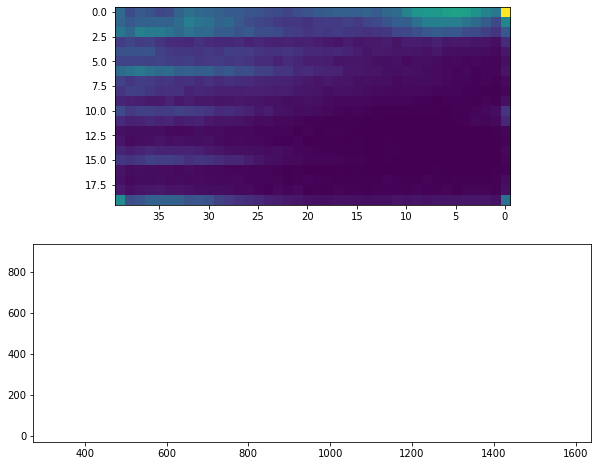

In [126]:
make_heatmap_scanpath(all_male_readings, verbose=False)

130it [00:12, 10.15it/s]


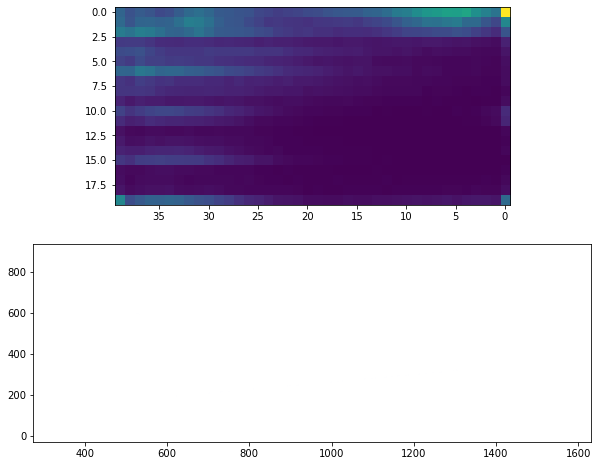

In [127]:
make_heatmap_scanpath(all_female_readings, verbose=False)

In [78]:
f = all_male_readings[3][55]
fix = f[f['eventType']=='fixation']
x = fix['meanX']
y = fix['meanY']

#heatmap, x_edges, y_edges = np.histogram2d(x, y, bins=(40,80))
#plt.imshow(heatmap)

x.shape[0]>1

True

In [ ]:
for subject in all_male_readings:
    print(type(subject))
    for i in subject:
        pass

In [31]:
f = pd.Series()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [34]:
f.empty

True

In [124]:
1e-10

1e-10